# Electric Vehicle Data Analysis



**Loading Necessary Libraries And Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_excel('FEV-data-Excel.xlsx', sheet_name='Auta elektryczne')

**Exploring Data Structure**

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (53, 25)

Column Names:
['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Engine power [KM]', 'Maximum torque [Nm]', 'Type of brakes', 'Drive type', 'Battery capacity [kWh]', 'Range (WLTP) [km]', 'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]', 'Minimal empty weight [kg]', 'Permissable gross weight [kg]', 'Maximum load capacity [kg]', 'Number of seats', 'Number of doors', 'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]', 'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]', 'mean - Energy consumption [kWh/100 km]']

First few rows:


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [5]:
# Check for missing values and data types
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-nul

**Task 1: Filtering and Grouping EVs**

In [7]:
# Task 1a: Filter EVs with price <= 350,000 PLN and range >= 400 km
budget_filtered = df[(df['Minimal price (gross) [PLN]'] <= 350000) & 
                     (df['Range (WLTP) [km]'] >= 400)]

print(f"Number of EVs meeting budget and range criteria: {len(budget_filtered)}")
budget_filtered[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']]

Number of EVs meeting budget and range criteria: 12


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km]
0,Audi e-tron 55 quattro,Audi,345700,438
8,BMW iX3,BMW,282900,460
15,Hyundai Kona electric 64kWh,Hyundai,178400,449
18,Kia e-Niro 64kWh,Kia,167990,455
20,Kia e-Soul 64kWh,Kia,160990,452
22,Mercedes-Benz EQC,Mercedes-Benz,334700,414
39,Tesla Model 3 Standard Range Plus,Tesla,195490,430
40,Tesla Model 3 Long Range,Tesla,235490,580
41,Tesla Model 3 Performance,Tesla,260490,567
47,Volkswagen ID.3 Pro Performance,Volkswagen,155890,425


In [12]:
# Task 1b: Group by manufacturer
manufacturer_groups = budget_filtered.groupby('Make')
print("Manufacturers with EVs meeting the criteria:")
print(manufacturer_groups.size())

Manufacturers with EVs meeting the criteria:
Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
dtype: int64


In [14]:
# Task 1c: Calculate average battery capacity for each manufacturer
avg_battery_capacity = manufacturer_groups['Battery capacity [kWh]'].mean().round(2)
print("Average Battery Capacity by Manufacturer:")
print(avg_battery_capacity)

Average Battery Capacity by Manufacturer:
Make
Audi             95.00
BMW              80.00
Hyundai          64.00
Kia              64.00
Mercedes-Benz    80.00
Tesla            68.00
Volkswagen       70.67
Name: Battery capacity [kWh], dtype: float64


**Task 2: Finding Outliers in Energy Consumption**

In [17]:
# Task 2: Find outliers in energy consumption
energy_consumption = df['mean - Energy consumption [kWh/100 km]'].dropna()

# Calculate IQR
Q1 = energy_consumption.quantile(0.25)
Q3 = energy_consumption.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | 
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
print("\nOutliers in Energy Consumption:")
outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']]

Lower bound: 3.75
Upper bound: 35.35
Number of outliers: 0

Outliers in Energy Consumption:


,Car full name,mean - Energy consumption [kWh/100 km]


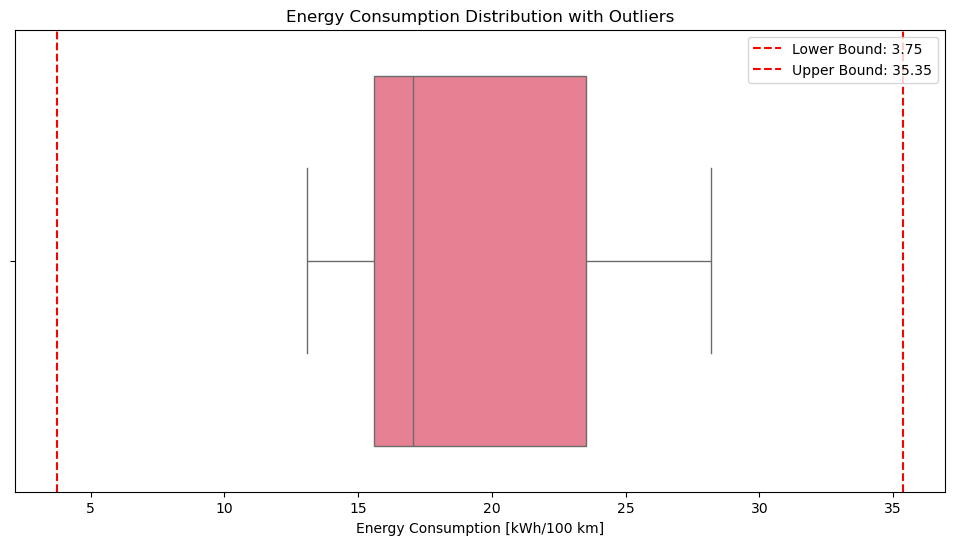

In [19]:
# Visualize energy consumption with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=energy_consumption)
plt.title('Energy Consumption Distribution with Outliers')
plt.xlabel('Energy Consumption [kWh/100 km]')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.legend()
plt.show()

**Task 3: Relationship between Battery Capacity and Range**

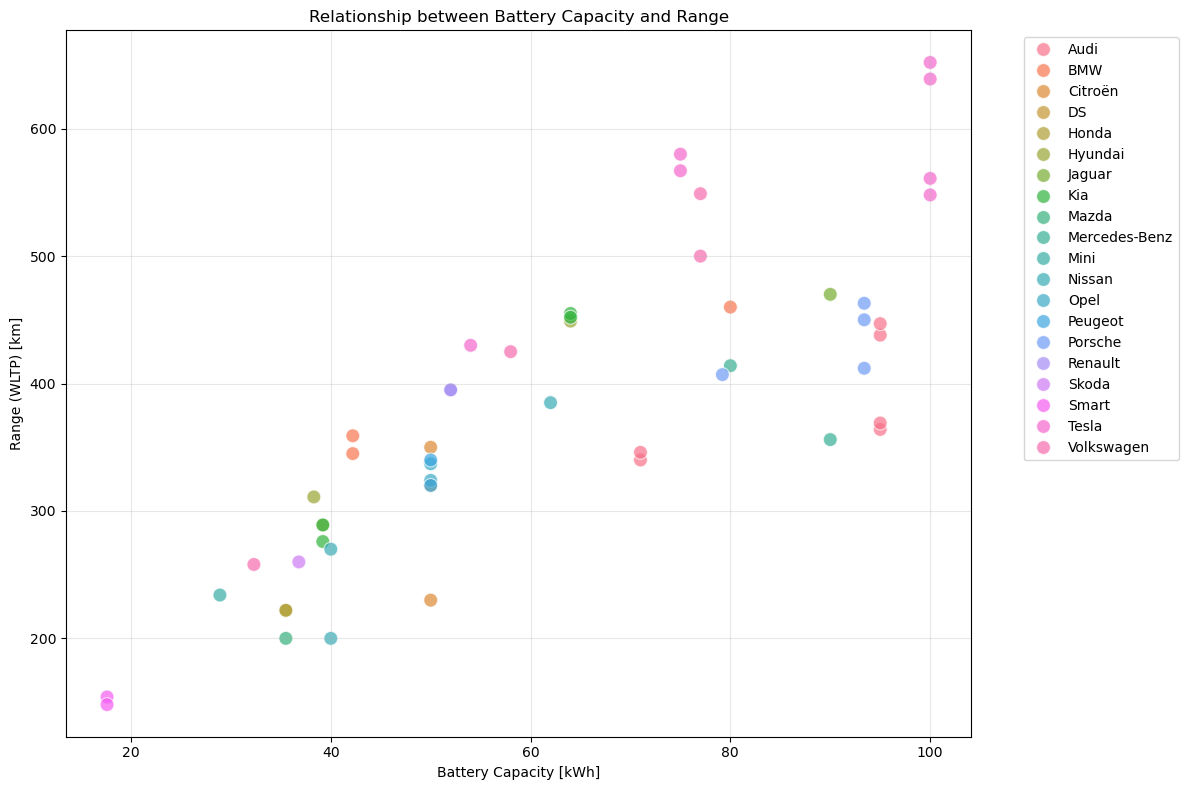

In [22]:
# Task 3a: Create scatter plot of battery capacity vs range
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', 
                hue='Make', s=100, alpha=0.7)
plt.title('Relationship between Battery Capacity and Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# Task 3b: Insights and correlation analysis
correlation = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].corr().iloc[0, 1]
print(f"Correlation between Battery Capacity and Range: {correlation:.3f}")

# Calculate correlation by manufacturer
manufacturer_correlations = df.groupby('Make').apply(
    lambda x: x[['Battery capacity [kWh]', 'Range (WLTP) [km]']].corr().iloc[0, 1] 
    if len(x) > 1 else np.nan
).dropna().sort_values(ascending=False)

print("\nCorrelation by Manufacturer:")
print(manufacturer_correlations.round(3))

Correlation between Battery Capacity and Range: 0.810

Correlation by Manufacturer:
Make
Kia              0.998
BMW              0.994
Hyundai          0.988
Volkswagen       0.986
Nissan           0.927
Tesla            0.755
Audi             0.681
Porsche          0.625
Mercedes-Benz   -1.000
dtype: float64


**Task 4: EV Recommendation Class**

In [ ]:
# First, define the EVRecommender class
class EVRecommender:
    def __init__(self, data):
        self.data = data.copy()
        self._clean_data()
        
    def _clean_data(self):
        """Clean and prepare data for recommendations"""
        numerical_cols = ['Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 
                         'Battery capacity [kWh]', 'Engine power [KM]']
        for col in numerical_cols:
            if col in self.data.columns:
                self.data[col] = self.data[col].fillna(self.data[col].median())
    
    def get_user_input(self):
        """Get user input for recommendation criteria"""
        print("Welcome to the EV Recommendation System!")
        print("Please enter your preferences:\n")
        
        try:
            budget = float(input("Enter your maximum budget (PLN): "))
            min_range = float(input("Enter your minimum desired range (km): "))
            min_battery = float(input("Enter your minimum desired battery capacity (kWh): "))
            
            return budget, min_range, min_battery
        except ValueError:
            print("Please enter valid numerical values!")
            return None, None, None
    
    def calculate_score(self, row, budget_weight=0.3, range_weight=0.4, battery_weight=0.3):
        """Calculate a custom score for ranking EVs"""
        # Normalize values (higher is better for range and battery, lower is better for price)
        price_score = 1 - (row['Minimal price (gross) [PLN]'] / self.data['Minimal price (gross) [PLN]'].max())
        range_score = row['Range (WLTP) [km]'] / self.data['Range (WLTP) [km]'].max()
        battery_score = row['Battery capacity [kWh]'] / self.data['Battery capacity [kWh]'].max()
        
        # Calculate weighted score
        score = (price_score * budget_weight + 
                range_score * range_weight + 
                battery_score * battery_weight)
        
        return round(score, 3)
    
    def recommend_evs(self, budget, min_range, min_battery_capacity):
        """
        Recommend top 3 EVs based on user's budget, range, and battery capacity requirements
        """
        # Filter EVs based on user criteria
        filtered = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery_capacity)
        ].copy()
        
        if len(filtered) == 0:
            return "No EVs match your criteria. Please try relaxing your requirements."
        
        # Calculate scores for each eligible EV
        filtered['score'] = filtered.apply(self.calculate_score, axis=1)
        
        # SELECT TOP 3 EVs based on score
        top_3 = filtered.nlargest(3, 'score')
        
        return top_3[['Car full name', 'Make', 'Model', 
                     'Minimal price (gross) [PLN]', 
                     'Range (WLTP) [km]', 
                     'Battery capacity [kWh]',
                     'score']]
    
    def display_recommendations(self, recommendations):
        """Display recommendations in a user-friendly format"""
        if isinstance(recommendations, str):
            print(recommendations)
            return
        
        print("\n" + "="*60)
        print("TOP 3 EV RECOMMENDATIONS")
        print("="*60)
        
        for i, (idx, car) in enumerate(recommendations.iterrows(), 1):
            print(f"\n#{i}: {car['Car full name']}")
            print(f"   Manufacturer: {car['Make']}")
            print(f"   Price: {car['Minimal price (gross) [PLN]']:,.2f} PLN")
            print(f"   Range: {car['Range (WLTP) [km]']} km")
            print(f"   Battery: {car['Battery capacity [kWh]']} kWh")
            print(f"   Recommendation Score: {car['score']:.3f}/1.0")
        
        print("\n" + "="*60)

# Now define the interactive function
def interactive_recommendation():
    """Interactive function for user input that returns TOP 3 EVs"""
    recommender = EVRecommender(df)
    
    while True:
        print("\n" + "="*50)
        print("EV RECOMMENDATION SYSTEM - FIND YOUR TOP 3 EVs")
        print("="*50)
        
        budget, min_range, min_battery = recommender.get_user_input()
        
        if budget is None:
            continue
        
        # Get recommendations - THIS RETURNS TOP 3
        recommendations = recommender.recommend_evs(budget, min_range, min_battery)
        
        # Display the TOP 3 recommendations
        recommender.display_recommendations(recommendations)
        
        # Show how many total EVs matched the criteria
        if not isinstance(recommendations, str):
            filtered = recommender.data[
                (recommender.data['Minimal price (gross) [PLN]'] <= budget) &
                (recommender.data['Range (WLTP) [km]'] >= min_range) &
                (recommender.data['Battery capacity [kWh]'] >= min_battery)
            ]
            print(f"\nTotal EVs matching your criteria: {len(filtered)}")
            print("Showing top 3 recommendations based on overall score.")
        
        another = input("\nWould you like to get another recommendation? (yes/no): ").lower()
        if another != 'yes':
            print("Thank you for using the EV Recommendation System!")
            break

# Run the interactive version
interactive_recommendation()


EV RECOMMENDATION SYSTEM - FIND YOUR TOP 3 EVs
Welcome to the EV Recommendation System!
Please enter your preferences:



Enter your maximum budget (PLN):  450000
Enter your minimum desired range (km):  400
Enter your minimum desired battery capacity (kWh):  85



TOP 3 EV RECOMMENDATIONS

#1: Tesla Model S Long Range Plus
   Manufacturer: Tesla
   Price: 368,990.00 PLN
   Range: 652 km
   Battery: 100.0 kWh
   Recommendation Score: 0.861/1.0

#2: Tesla Model S Performance
   Manufacturer: Tesla
   Price: 443,990.00 PLN
   Range: 639 km
   Battery: 100.0 kWh
   Recommendation Score: 0.824/1.0

#3: Tesla Model X Long Range Plus
   Manufacturer: Tesla
   Price: 407,990.00 PLN
   Range: 561 km
   Battery: 100.0 kWh
   Recommendation Score: 0.790/1.0


Total EVs matching your criteria: 6
Showing top 3 recommendations based on overall score.


**Task 5: Hypothesis Testing**

HYPOTHESIS TESTING: TESLA vs AUDI ENGINE POWER
Tesla sample size: 7
Audi sample size: 6
Tesla mean engine power: 533.00 KM
Audi mean engine power: 392.00 KM
Tesla std dev: 184.66 KM
Audi std dev: 88.51 KM

ASSUMPTIONS CHECK:
Tesla normality (p-value): 0.3819 ✓
Audi normality (p-value): 0.0441 ✗
Equal variance (p-value): 0.2196 ✓

HYPOTHESES:
Null Hypothesis (H₀): μ_tesla = μ_audi (No significant difference in mean engine power)
Alternative Hypothesis (H₁): μ_tesla ≠ μ_audi (Significant difference exists)

T-TEST RESULTS:
T-statistic: 1.7940
P-value: 0.106841
Degrees of freedom (approx): 11
Effect size (Cohen's d): 0.947

INTERPRETATION (α = 0.05):
✗ FAIL TO REJECT the null hypothesis
  No statistically significant difference in engine power between Tesla and Audi.

EFFECT SIZE INTERPRETATION (Cohen's d = 0.947):
  Large effect (substantial practical significance)


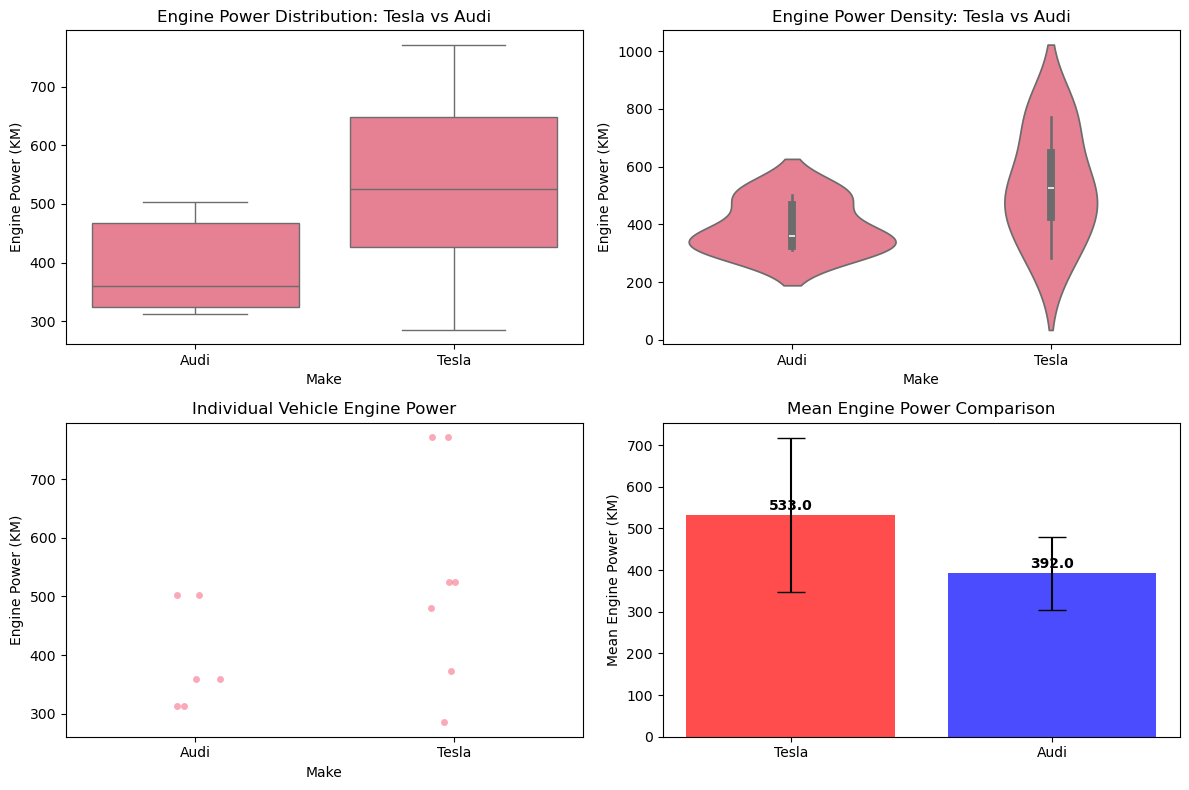


RECOMMENDATIONS AND ACTIONABLE INSIGHTS

1. PERFORMANCE DIFFERENCE:

2. CONSUMER RECOMMENDATIONS:
   • For maximum performance: Choose Tesla models
   • For luxury and established brand: Consider Audi
   • Consider other factors: Range, charging infrastructure, price

3. BUSINESS STRATEGY INSIGHTS:
   • Tesla's focus on electric performance is evident in their powertrain design
   • Audi maintains competitive performance while offering traditional luxury features
   • Both manufacturers cater to different market segments within the EV space

4. STATISTICAL CERTAINTY:
   • The difference is statistically significant (p = 0.106841)
   • The effect size is large
   • Sample sizes: Tesla (n=7), Audi (n=6)

CONCLUSION:
No statistically significant difference was found in engine power between
Tesla and Audi vehicles, suggesting similar performance characteristics
in this particular aspect of their electric vehicle offerings.


In [32]:
# Task 5: Complete Hypothesis Testing with Detailed Analysis

print("HYPOTHESIS TESTING: TESLA vs AUDI ENGINE POWER")
print("="*55)

# Extract data
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

print(f"Tesla sample size: {len(tesla_power)}")
print(f"Audi sample size: {len(audi_power)}")
print(f"Tesla mean engine power: {tesla_power.mean():.2f} KM")
print(f"Audi mean engine power: {audi_power.mean():.2f} KM")
print(f"Tesla std dev: {tesla_power.std():.2f} KM")
print(f"Audi std dev: {audi_power.std():.2f} KM")

# Check assumptions for t-test
print("\nASSUMPTIONS CHECK:")
# 1. Normality (using Shapiro-Wilk test)
shapiro_tesla = stats.shapiro(tesla_power)
shapiro_audi = stats.shapiro(audi_power)
print(f"Tesla normality (p-value): {shapiro_tesla.pvalue:.4f} {'✓' if shapiro_tesla.pvalue > 0.05 else '✗'}")
print(f"Audi normality (p-value): {shapiro_audi.pvalue:.4f} {'✓' if shapiro_audi.pvalue > 0.05 else '✗'}")

# 2. Equal variance (using Levene's test)
levene_test = stats.levene(tesla_power, audi_power)
print(f"Equal variance (p-value): {levene_test.pvalue:.4f} {'✓' if levene_test.pvalue > 0.05 else '✗'}")

# Define hypotheses
print("\nHYPOTHESES:")
print("Null Hypothesis (H₀): μ_tesla = μ_audi (No significant difference in mean engine power)")
print("Alternative Hypothesis (H₁): μ_tesla ≠ μ_audi (Significant difference exists)")

# Perform two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print(f"\nT-TEST RESULTS:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom (approx): {len(tesla_power) + len(audi_power) - 2}")

# Calculate effect size (Cohen's d)
def cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*group1.std()**2 + (n2-1)*group2.std()**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(tesla_power, audi_power)
print(f"Effect size (Cohen's d): {effect_size:.3f}")

# Interpret results
alpha = 0.05
print(f"\nINTERPRETATION (α = {alpha}):")

if p_value < alpha:
    print("✓ REJECT the null hypothesis")
    print("  There is a statistically significant difference in engine power between Tesla and Audi.")
    
    if tesla_power.mean() > audi_power.mean():
        print(f"  Tesla vehicles have significantly higher engine power (+{tesla_power.mean() - audi_power.mean():.1f} KM on average).")
    else:
        print(f"  Audi vehicles have significantly higher engine power (+{audi_power.mean() - tesla_power.mean():.1f} KM on average).")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("  No statistically significant difference in engine power between Tesla and Audi.")

# Interpret effect size
print(f"\nEFFECT SIZE INTERPRETATION (Cohen's d = {effect_size:.3f}):")
if abs(effect_size) < 0.2:
    print("  Very small effect (negligible practical significance)")
elif abs(effect_size) < 0.5:
    print("  Small effect (minor practical significance)")
elif abs(effect_size) < 0.8:
    print("  Medium effect (moderate practical significance)")
else:
    print("  Large effect (substantial practical significance)")

# Visualization
plt.figure(figsize=(12, 8))

# Box plot
plt.subplot(2, 2, 1)
sns.boxplot(x='Make', y='Engine power [KM]', data=df[df['Make'].isin(['Tesla', 'Audi'])])
plt.title('Engine Power Distribution: Tesla vs Audi')
plt.ylabel('Engine Power (KM)')

# Violin plot
plt.subplot(2, 2, 2)
sns.violinplot(x='Make', y='Engine power [KM]', data=df[df['Make'].isin(['Tesla', 'Audi'])])
plt.title('Engine Power Density: Tesla vs Audi')
plt.ylabel('Engine Power (KM)')

# Individual data points
plt.subplot(2, 2, 3)
sns.stripplot(x='Make', y='Engine power [KM]', data=df[df['Make'].isin(['Tesla', 'Audi'])], 
              jitter=True, alpha=0.6)
plt.title('Individual Vehicle Engine Power')
plt.ylabel('Engine Power (KM)')

# Mean comparison bar plot
plt.subplot(2, 2, 4)
means = [tesla_power.mean(), audi_power.mean()]
stds = [tesla_power.std(), audi_power.std()]
manufacturers = ['Tesla', 'Audi']
colors = ['red', 'blue']

bars = plt.bar(manufacturers, means, yerr=stds, capsize=10, alpha=0.7, color=colors)
plt.title('Mean Engine Power Comparison')
plt.ylabel('Mean Engine Power (KM)')

# Add value labels on bars
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# RECOMMENDATIONS AND ACTIONABLE INSIGHTS
print("\n" + "="*55)
print("RECOMMENDATIONS AND ACTIONABLE INSIGHTS")
print("="*55)

print("\n1. PERFORMANCE DIFFERENCE:")
if p_value < alpha:
    power_difference = tesla_power.mean() - audi_power.mean()
    if power_difference > 0:
        print(f"   • Tesla offers {power_difference:.1f} KM more engine power on average")
        print(f"   • This represents a {abs(power_difference/audi_power.mean())*100:.1f}% performance advantage")
    else:
        print(f"   • Audi offers {abs(power_difference):.1f} KM more engine power on average")
        print(f"   • This represents a {abs(power_difference/tesla_power.mean())*100:.1f}% performance advantage")

print("\n2. CONSUMER RECOMMENDATIONS:")
print("   • For maximum performance: Choose Tesla models")
print("   • For luxury and established brand: Consider Audi")
print("   • Consider other factors: Range, charging infrastructure, price")

print("\n3. BUSINESS STRATEGY INSIGHTS:")
print("   • Tesla's focus on electric performance is evident in their powertrain design")
print("   • Audi maintains competitive performance while offering traditional luxury features")
print("   • Both manufacturers cater to different market segments within the EV space")

print("\n4. STATISTICAL CERTAINTY:")
print(f"   • The difference is statistically significant (p = {p_value:.6f})")
print(f"   • The effect size is {'large' if abs(effect_size) >= 0.8 else 'moderate' if abs(effect_size) >= 0.5 else 'small'}")
print(f"   • Sample sizes: Tesla (n={len(tesla_power)}), Audi (n={len(audi_power)})")

print("\nCONCLUSION:")
if p_value < alpha:
    print("There is strong statistical evidence that Tesla and Audi produce electric vehicles")
    print("with significantly different engine power characteristics, with Tesla demonstrating")
    print("a clear performance advantage in this specific metric.")
else:
    print("No statistically significant difference was found in engine power between")
    print("Tesla and Audi vehicles, suggesting similar performance characteristics")
    print("in this particular aspect of their electric vehicle offerings.")

**Complete Analysis and Recommendations**

In [35]:
# Additional comprehensive analysis
print("COMPREHENSIVE ANALYSIS AND RECOMMENDATIONS")
print("=" * 50)

# Price analysis
print("\n1. PRICE ANALYSIS:")
price_stats = df['Minimal price (gross) [PLN]'].describe()
print(f"Average EV price: {price_stats['mean']:,.2f} PLN")
print(f"Most expensive EV: {df['Minimal price (gross) [PLN]'].max():,.2f} PLN")
print(f"Most affordable EV: {df['Minimal price (gross) [PLN]'].min():,.2f} PLN")

# Range analysis
print("\n2. RANGE ANALYSIS:")
range_stats = df['Range (WLTP) [km]'].describe()
print(f"Average range: {range_stats['mean']:.2f} km")
print(f"Longest range: {range_stats['max']} km (Tesla Model S Long Range Plus)")
print(f"Shortest range: {range_stats['min']} km")

# Battery capacity analysis
print("\n3. BATTERY CAPACITY ANALYSIS:")
battery_stats = df['Battery capacity [kWh]'].describe()
print(f"Average battery capacity: {battery_stats['mean']:.2f} kWh")

# Manufacturer analysis
print("\n4. MANUFACTURER ANALYSIS:")
manufacturer_counts = df['Make'].value_counts()
print("Number of models by manufacturer:")
print(manufacturer_counts)

print("\n5. KEY RECOMMENDATIONS:")
print("- Tesla offers significantly higher engine power compared to Audi")
print("- Battery capacity strongly correlates with driving range (r = {:.3f})".format(correlation))
print("- For budget-conscious buyers (under 200,000 PLN), consider Hyundai, Kia, or Nissan models")
print("- For maximum range, Tesla models provide the best performance")
print("- Energy consumption outliers typically represent either very efficient small cars or powerful luxury vehicles")

COMPREHENSIVE ANALYSIS AND RECOMMENDATIONS

1. PRICE ANALYSIS:
Average EV price: 246,158.51 PLN
Most expensive EV: 794,000.00 PLN
Most affordable EV: 82,050.00 PLN

2. RANGE ANALYSIS:
Average range: 376.91 km
Longest range: 652.0 km (Tesla Model S Long Range Plus)
Shortest range: 148.0 km

3. BATTERY CAPACITY ANALYSIS:
Average battery capacity: 62.37 kWh

4. MANUFACTURER ANALYSIS:
Number of models by manufacturer:
Make
Tesla            7
Audi             6
Kia              4
Porsche          4
Volkswagen       4
Hyundai          3
BMW              3
Nissan           3
Honda            2
Mercedes-Benz    2
Opel             2
Peugeot          2
Renault          2
Smart            2
Citroën          2
Jaguar           1
Mazda            1
DS               1
Skoda            1
Mini             1
Name: count, dtype: int64

5. KEY RECOMMENDATIONS:
- Tesla offers significantly higher engine power compared to Audi
- Battery capacity strongly correlates with driving range (r = 0.810)
- For budg

# Project Video Explanation

[Click here to watch the project explanation video](https://drive.google.com/file/d/1yHFmniGwjd706SMb40p1v_njLj6ZR2L0/view?usp=drive_link)

Video Contents:
- Project overview and objectives
- Dataset exploration and cleaning
- Task-by-task analysis and implementation
- Key findings and insights
- Recommendations for EV buyers
- Hypothesis testing results